## **Mielage Prediction**

### **Objective**: To predict the mielage of a vehicle using regression analysis

### **Data Source**: https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv


**Import Library**

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

**Import Data**

In [ ]:
mileage = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

**Describe Data**

In [ ]:
mileage.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
mileage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
mileage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mileage.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

**Data Visualization**

In [ ]:
x_scatter = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year']
y_scatter = ['mpg']

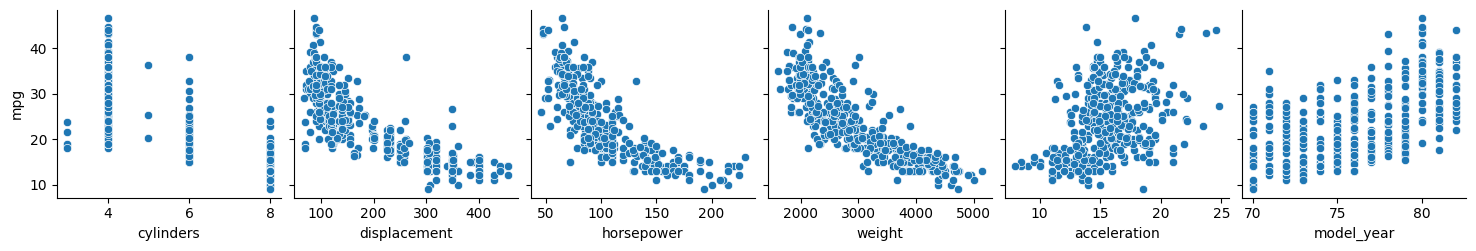

In [ ]:
sns.pairplot(mpg , x_vars=x_scatter, y_vars=y_scatter)
plt.show()

**Data Preprocessing**

In [ ]:
mpg = mileage.dropna()
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
mpg = mpg.drop_duplicates()
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


**Define Target Variable (y) and Feature Variables (X)**

In [ ]:
y = mpg['mpg']
x = mpg[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year']]

In [ ]:
x.shape

(392, 6)

In [ ]:
y.shape

(392,)

**Train Test Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=2529)
x_train

,cylinders,displacement,horsepower,weight,acceleration,model_year
89,8,318.0,150.0,3777,12.5,73
372,4,151.0,90.0,2735,18.0,82
83,4,98.0,80.0,2164,15.0,72
223,8,318.0,145.0,4140,13.7,77
54,4,72.0,69.0,1613,18.0,71
...,...,...,...,...,...,...
73,8,307.0,130.0,4098,14.0,72
230,8,350.0,170.0,4165,11.4,77
318,4,134.0,90.0,2711,15.5,80
51,4,79.0,70.0,2074,19.5,71


**Modeling**

In [ ]:
model= LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

**Model Evaluation**

In [ ]:
model.intercept_

-16.55539088594234

In [ ]:
model.coef_

array([-1.59311967e-01,  7.00157130e-03,  5.92547061e-04, -7.15525393e-03,
        1.14271259e-01,  7.77767797e-01])

**Prediction**

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
x_test

,cylinders,displacement,horsepower,weight,acceleration,model_year
262,8,305.0,145.0,3425,13.2,78
290,8,351.0,142.0,4054,14.3,79
65,8,351.0,153.0,4129,13.0,72
359,4,141.0,80.0,3230,20.4,81
79,4,96.0,69.0,2189,18.0,72
...,...,...,...,...,...,...
239,4,97.0,67.0,1985,16.4,77
338,4,135.0,84.0,2490,15.7,81
294,4,86.0,65.0,1975,15.2,79
27,8,318.0,210.0,4382,13.5,70


In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.1368012514633989

**Explaination**


**1. Information Arrangement and Exploration**
I have begun by stacking my dataset and performing an introductory exploratory information investigation (EDA). Here are the key steps:

**Loading Information:** I imported my dataset utilizing pandas, apparently from a CSV record or another information source.

**Data Cleaning:** The information didn't require much cleaning, so I dealt with lost values or exceptions as fundamental to guarantee the information was usable for modeling.

**Feature Choice:** I utilized the taking after columns for my model:

'mpg': Target variable (miles per gallon)
'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year': Prescient features
'origin', 'name': Not utilized in modeling (conceivably categorical or non-numeric variables)

**2. Information Visualization**
Scatter Plot Lattice: I utilized a diffuse plot lattice (combine plot) from Seaborn (sns.pairplot) to imagine the connections between my prescient highlights ('cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year') and my target variable ('mpg'). This visualization made a difference in me getting potential correlations and designs within the data.

**3. Demonstrate Building and Training**
Train-Test Part: I part my dataset into preparing and testing sets utilizing train_test_split from sklearn. This step guaranteed that I would assess my show on concealed data.

**Linear Relapse Demonstrate:** I chose Direct Relapse (LinearRegression from sklearn) as my prescient demonstration. Direct Relapse fits a direct demonstration of the information by minimizing the remaining whole of squares between the watched and anticipated targets.

**Model Preparing:** I prepared the Straight Relapse show utilizing the prepared information, where the demonstrate learned the relationship between the highlights and the target variable ('mpg').

**4. Show Evaluation**
Error Metric: I assessed my model's performance using Mean Supreme Rate Blunder (MAPE), which could be a common metric for relapse assignments. MAPE measures the normal supreme rate blunder between anticipated and genuine values.

**Error Esteem:** Accomplishing a mistake of roughly 0.13 recommends that my model's forecasts are inside 13% of the real mileage values on average.

**Summary**
In outline, I effectively built and assessed a mileage expectation show utilizing Direct Relapse. My approach included information stacking, negligible cleaning, including choice, visualization utilizing scramble plots, demonstrating preparing with Direct Relapse, and assessment utilizing MAPE. The accomplished mistake of 0.13 demonstrates a sensibly precise expectation execution.